## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read-In Data

In [4]:
df = pd.read_csv('./data/insurance.csv')

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.drop(columns = 'id', inplace = True)

In [7]:
df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


## Clean Data

In [8]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.dtypes
# Region Code -> String
# Vehicle Damage -> Switch to 0 and 1
# Sales Channel -> String
# Vintage -> Change name to customer_duration

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [12]:
df['Region_Code'] = df['Region_Code'].map(str)

In [15]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No': 0})

In [17]:
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].map(str)

In [19]:
df.rename(columns = {'Vintage':'Customer_Duration'}, inplace = True)

In [20]:
df.describe()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Customer_Duration,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,0.458210,0.504877,30564.389581,154.347397,0.122563
std,15.511611,0.046110,0.498251,0.499977,17213.155057,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,10.000000,0.000000
25%,25.000000,1.000000,0.000000,0.000000,24405.000000,82.000000,0.000000
50%,36.000000,1.000000,0.000000,1.000000,31669.000000,154.000000,0.000000
75%,49.000000,1.000000,1.000000,1.000000,39400.000000,227.000000,0.000000
max,85.000000,1.000000,1.000000,1.000000,540165.000000,299.000000,1.000000


## EDA

In [21]:
# Areas of Interest

## Age of People who are interested
## Number of People Who Were Previously Insuranced but willing to switch insurance
## Vehicle_Damage and interested (Premium)
## Is there an outreach channel that results in highest interest?
## Does customer loyalty seem to come into play?
## Gender + Interest
## Gender + Premium

### Functions

In [48]:
def create_barplot(x, y, data, size = (10,6), hue = None, title = '', x_label = '', y_label = ''):
    plt.figure(figsize = size)
    sns.barplot(x = x, y = y, data = data, hue = hue, linewidth = 1, edgecolor = 'black', palette = 'viridis')
    plt.title(title, size = 15)
    plt.xlabel(x_label, size = 13)
    plt.ylabel(y_label, size = 13)

In [54]:
def create_countplot(x, data, y = None, size = (10,6), hue = None, title = '', x_label = '', y_label = 'Count'):
    plt.figure(figsize = size)
    sns.countplot(x = x, y = y, data = data, hue = hue, linewidth = 1, edgecolor = 'black', palette = 'viridis')
    plt.title(title, size = 15)
    plt.xlabel(x_label, size = 13)
    plt.ylabel(y_label, size = 13)

In [66]:
def create_scatter(x, y, data, size = (10,6), hue = None, title = '', x_label = '', y_label = ''):
    plt.figure(figsize = size)
    sns.scatterplot(x = x, y = y, data = data, hue = hue, palette = 'viridis')
    plt.title(title, size = 15)
    plt.xlabel(x_label, size = 13)
    plt.ylabel(y_label, size = 13)

### Age Distribution of Customers

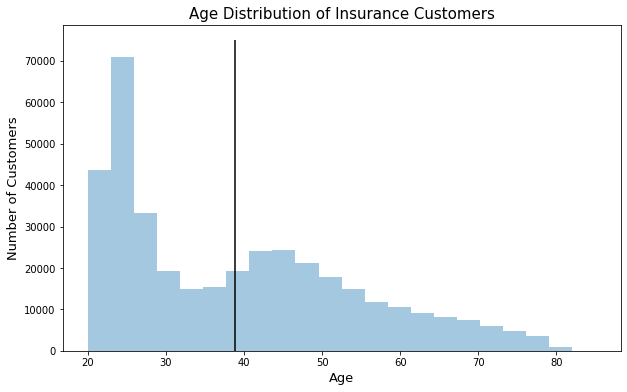

In [41]:
plt.figure(figsize = (10,6))
sns.distplot(df['Age'], bins = 22, kde = False)
plt.vlines(x = df['Age'].mean(), ymin = 0, ymax = 75000, color = 'black')
plt.title('Age Distribution of Insurance Customers', size = 15)
plt.xlabel('Age', size = 13)
plt.ylabel('Number of Customers', size = 13);

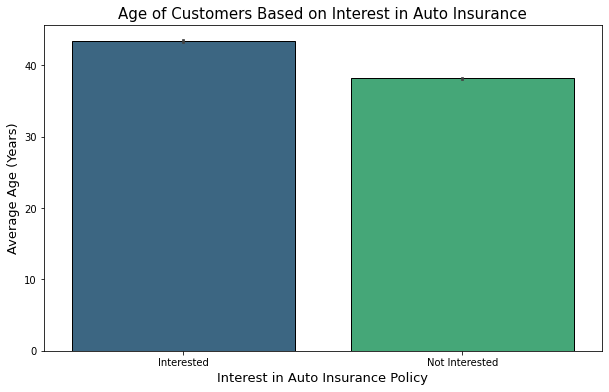

In [51]:
create_barplot(x = df['Response'].map({0:'Not Interested', 1: 'Interested'}), 
               y = 'Age', 
               data = df,
               title = 'Age of Customers Based on Interest in Auto Insurance',
               x_label = 'Interest in Auto Insurance Policy',
               y_label = 'Average Age (Years)'
               )

### Current Policy Holders Interested in Switching

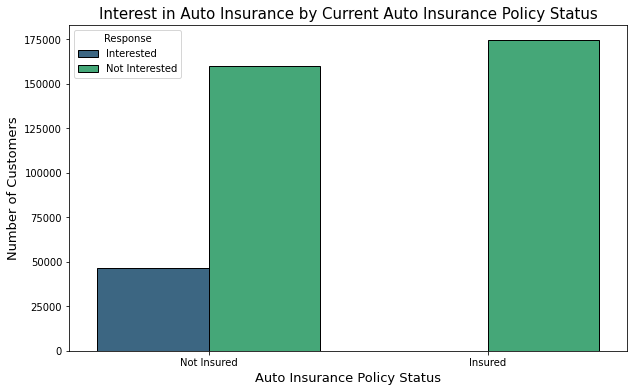

In [57]:
create_countplot(x = df['Previously_Insured'].map({0: 'Not Insured', 1: 'Insured'}), 
                 data = df, 
                 hue = df['Response'].map({0:'Not Interested', 1:'Interested'}),
                 title = 'Interest in Auto Insurance by Current Auto Insurance Policy Status',
                 x_label = 'Auto Insurance Policy Status',
                 y_label = 'Number of Customers')

In [64]:
mask1 = df['Response'] == 1
mask2 = df['Previously_Insured'] == 1

df[mask1 & mask2].shape

(158, 11)

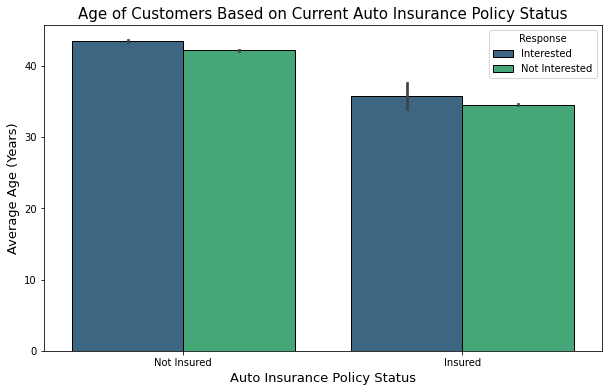

In [61]:
create_barplot(x = df['Previously_Insured'].map({0: 'Not Insured', 1: 'Insured'}), 
               y = 'Age', 
               data = df,
               hue = df['Response'].map({0:'Not Interested', 1:'Interested'}),
               title = 'Age of Customers Based on Current Auto Insurance Policy Status',
               x_label = 'Auto Insurance Policy Status',
               y_label = 'Average Age (Years)'
               )

In [65]:
mask1 = df['Response'] == 1
mask2 = df['Previously_Insured'] == 0

df[mask1 & mask2]['Age'].mean()

43.46182763361402

**TAKEAWAY**: There are 158 customers with a current auto insurance policy who would be interested in switching. The average age of customers that are interested in an auto insurance policy are older than those who are not interested.

### Relationship Between Previous Vehicle Damage and Insurance Premium

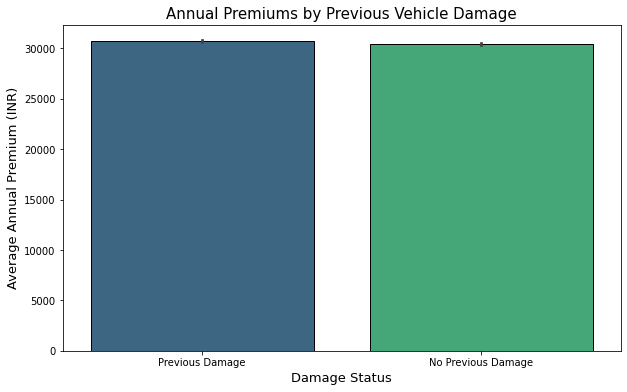

In [79]:
create_barplot(x = df['Vehicle_Damage'].map({0: 'No Previous Damage', 1: 'Previous Damage'}), 
               y = 'Annual_Premium', 
               data = df,
              title = 'Annual Premiums by Previous Vehicle Damage',
              x_label = 'Damage Status',
              y_label = 'Average Annual Premium (INR)')

In [73]:
round(df.groupby('Vehicle_Damage')['Annual_Premium'].mean(), 2)

Vehicle_Damage
0    30401.88
1    30723.76
Name: Annual_Premium, dtype: float64

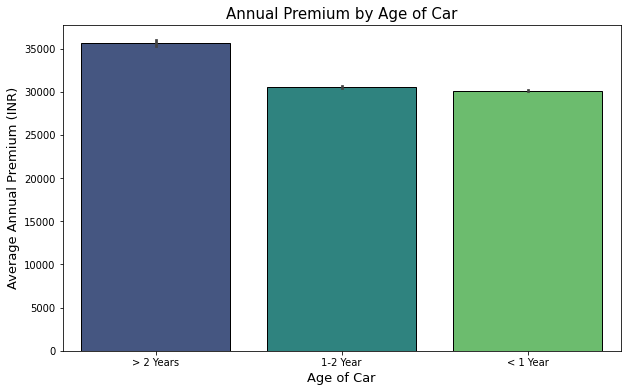

In [80]:
create_barplot(x = 'Vehicle_Age', 
               y = 'Annual_Premium', 
               data = df,
               title = 'Annual Premium by Age of Car',
               x_label = 'Age of Car',
               y_label = 'Average Annual Premium (INR)')

### Is there a sales avenue that results in highest interest?

In [92]:
df.groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending = False)

Policy_Sales_Channel
43.0     1.000000
123.0    1.000000
28.0     0.333333
27.0     0.333333
36.0     0.326923
           ...   
50.0     0.000000
118.0    0.000000
117.0    0.000000
137.0    0.000000
99.0     0.000000
Name: Response, Length: 155, dtype: float64

In [91]:
df[df['Policy_Sales_Channel'] == '43.0']

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Customer_Duration,Response
228805,Male,45,1,28.0,0,1-2 Year,1,57744.0,43.0,277,1


In [106]:
df[df['Policy_Sales_Channel'].map(df['Policy_Sales_Channel'].value_counts() > 1)
].groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending = False)

Policy_Sales_Channel
28.0     0.333333
27.0     0.333333
36.0     0.326923
155.0    0.320097
163.0    0.304183
           ...   
34.0     0.000000
33.0     0.000000
126.0    0.000000
146.0    0.000000
99.0     0.000000
Name: Response, Length: 148, dtype: float64